In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import numpy as np
from qiskit.circuit.library import UnitaryGate


qreg_phi = QuantumRegister(5, 'phi')
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_phi, qreg_q, creg_c)

U = np.load('matrix.npy')
values, vectors = np.linalg.eig(U)
circuit.initialize(vectors[:, 0], qreg_phi)

# Start phase estimation for U = p(theta)
# Hadamard
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

# Apply controlled U's
repetitions = 1
for i in range(5, 5+3):
    for rep in range(repetitions):
        circuit.append(UnitaryGate(U).control(1), [i, *qreg_phi])
    repetitions *= 2

# Uncompute QFT

circuit.h(qreg_q[2])

circuit.cp(-pi / 2, qreg_q[2], qreg_q[1])
circuit.h(qreg_q[1])

circuit.cp(-pi / 4, qreg_q[2], qreg_q[0])
circuit.cp(-pi / 2, qreg_q[1], qreg_q[0])
circuit.h(qreg_q[0])

# Swap qubits
circuit.swap(qreg_q[0], qreg_q[2])

circuit.measure(qreg_q, creg_c)

In [20]:
circuit.draw()

»
phi_0: »
       »
phi_1: »
       »
phi_2: »
       »
phi_3: »
       »
phi_4: »
       »
  q_0: »
       »
  q_1: »
       »
  q_2: »
       »
  c: 3/»
       »
«       ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«phi_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ├»
«       │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         │»
«phi_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ├»
«       │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         │»
«phi_2: ┤2 Initialize(-0.16706-0.054246j,-0.17236-0.0096913j,-0.043709+0.017438j,0.090089-0.15316j,0.30501,0.051552+0.047961j,-0.12918-0.11324j,0.024618-0.177j,-0.10687+0.28079j,-0.050137-0.28476j,0.051571+0.26588j,0.012204+0.13285j,0.096932-0.062102j,0.21521-0.12105j,-0.012236-0.06117j,0.17066-0.15104j,-0.25314-0.10678j,0.12615-0.001903j,-0.059679+0.073667j,0.11304-0.027399j,-0.10147+0.11981j,-0.012206-0.038353j,-0.069147-0.06462j,0.15442-0.12032j,-0.025871+0.010898j,-0.22577-0.11155j,-0.0056455+0.016932j,0.12744+0.00026837j,-0.17158-0.0085785j,0.0032221-0.026791j,0.063525-0.15421j,-0.14617-0.058382j) ├»
«       │                                                                                                                                                     

In [18]:
from qiskit import *
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit, backend=simulator, shots=2**15)
result = job.result()
counts = result.get_counts()
# print(counts)

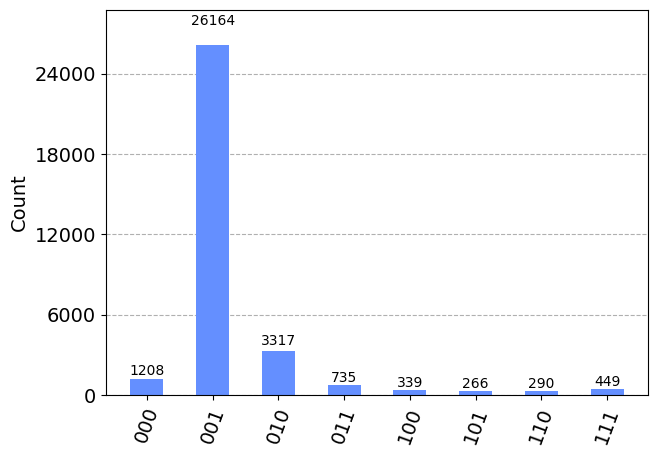

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)